In [78]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
import cv2
import xml.etree.ElementTree as ET 
import numpy as np
import sys
from getBoundingBoxes import *
from corner_detector import *
from getBoxFeatures import *
from anms import *
from utils import *
from estimateAllTranslation import *
from estimateFeatureTranslation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
cap = cv2.VideoCapture('vids/Easy.mp4')
ret,firstFrame = cap.read()
boxes = getBoundingBoxes()
gray = cv2.cvtColor(firstFrame,cv2.COLOR_BGR2GRAY)

boxesData = []

# for box in boxes:
#     boximg = gray[box[1]:box[3],box[0]:box[2]]
#     x,y = getBoxFeatures(boximg,box,10)
#     boxData = {
#         'coords': box,
#         '_x': x,
#         '_y': y
#     }
#     boxesData.append(boxData)
box = boxes[0]

currentFrame = firstFrame
_,nextFrame = cap.read()
_,thirdFrame = cap.read()

currentFrame = cv2.imread('frames/0001.png')
nextFrame = cv2.imread('frames/0003.png')
gray = cv2.cvtColor(currentFrame,cv2.COLOR_BGR2GRAY)


In [94]:
# Imag, Ix, Iy,Iori=findDerivatives(gray)
# plt.imshow(Imag)
# _x = boxesData[0]
_x,_y = getBoxFeatures(boximg,box,10)
X,Y=estimateAllTranslation(_x,_y,firstFrame,nextFrame)


print(X-_x)
print(Y-_y)

(10,)
(360, 640, 3)
u 0.32884755828896073
v -0.3441290450575317
(360, 640, 3)
u 0.9124348645415221
v -0.28966305654075
u -0.12569042419725415
v 0.20292197487096364
(360, 640, 3)
u 0.8012456260135403
v -0.359442776040688
u -0.36432720875151886
v 0.1815816358417121
u 0.1866129336815396
v -0.0801076807642595
u -0.08929402316327628
v 0.03914323191594285
(360, 640, 3)
u 0.3645775447637889
v -0.38023155688696114
(360, 640, 3)
u 0.1598114204968596
v -0.2821314248644068
u -0.020294591508131104
v 0.07554286942118091
(360, 640, 3)
u 0.5144626814366631
v -0.36704273158975675
u -0.02257671719437728
v 0.10790642454476243
(360, 640, 3)
u 0.8385559823308467
v -0.193855894870335
u -0.279922377669813
v 0.0718229911582495
u 0.0958474789922937
v -0.02134750996730085
(360, 640, 3)
u 0.52457053854826
v -0.3246311549349824
u -0.02371242352623968
v 0.06505805494068805
(360, 640, 3)
u 0.2907565903324913
v -0.37098466278859005
(360, 640, 3)
u 0.4690724762786075
v -0.2808994296082349
u -0.09814316038424158
v 0.

/home/saumya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


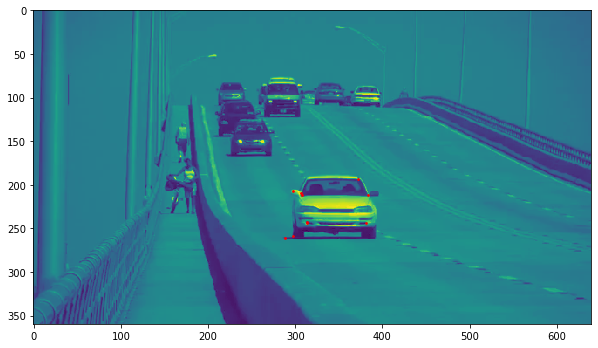

In [95]:
plt.imshow(gray)
fig = plt.gcf()
ax1 = fig.add_subplot(111)
ax1.scatter(_x,_y,c='r',s=3)
plt.savefig('second2_points.png')

/home/saumya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


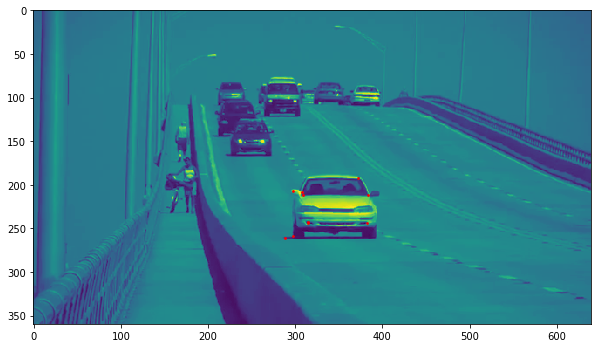

In [96]:
plt.imshow(cv2.cvtColor(nextFrame,cv2.COLOR_BGR2GRAY))
fig = plt.gcf()
ax1 = fig.add_subplot(111)
ax1.scatter(X,Y,c='r',s=3)
plt.savefig('third_points.png')
